In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/DatasetWeek2/bird.csv').dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      413 non-null    int64  
 1   huml    413 non-null    float64
 2   humw    413 non-null    float64
 3   ulnal   413 non-null    float64
 4   ulnaw   413 non-null    float64
 5   feml    413 non-null    float64
 6   femw    413 non-null    float64
 7   tibl    413 non-null    float64
 8   tibw    413 non-null    float64
 9   tarl    413 non-null    float64
 10  tarw    413 non-null    float64
 11  type    413 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 41.9+ KB


In [ ]:
df['type']

0      SW
1      SW
2      SW
3      SW
4      SW
       ..
415    SO
416    SO
417    SO
418    SO
419    SO
Name: type, Length: 413, dtype: object

In [ ]:
df.shape

(413, 12)

In [ ]:
df.head(10)

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
5,5,61.92,4.78,50.46,3.47,49.52,4.41,56.95,2.73,29.07,2.83,SW
6,6,79.73,5.94,67.39,4.50,42.07,3.41,71.26,3.56,37.22,3.64,SW
7,7,86.98,5.68,74.52,4.55,44.46,3.78,76.02,3.81,37.94,3.81,SW
8,8,118.20,7.82,116.64,6.13,59.33,5.45,110.00,5.58,61.62,4.37,SW
9,9,145.00,10.42,144.00,7.05,70.96,7.44,120.00,7.31,78.67,6.34,SW


In [ ]:
df['type'].value_counts()

SO    124
SW    116
W      64
R      48
P      38
T      23
Name: type, dtype: int64

In [ ]:
x=df.drop('type',axis=1)
y=df['type']

In [ ]:
encoder=OneHotEncoder()
encoder_Y=encoder.fit(y.values.reshape(-1,1))
encoded_Y=encoder_Y.transform(y.values.reshape(-1,1)).toarray()

In [ ]:
encoded_Y

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [ ]:
train_ratio=0.70
validation_ratio=0.15
test_ratio=0.15

In [ ]:
trainX,testX,trainY,testY=train_test_split(x,encoded_Y,test_size=1-train_ratio)

In [ ]:
valX,testX,valY,testY=train_test_split(testX,testY,
                                       test_size=test_ratio/(test_ratio+validation_ratio))

In [ ]:
trainX.shape

(289, 11)

In [ ]:
testX.shape

(31, 11)

In [ ]:
valX.shape

(31, 11)

In [ ]:
input_shape=trainX.shape[1]

In [ ]:
n_batch_size=20


In [ ]:
n_steps_per_epoch=int(trainX.shape[0]/n_batch_size)
n_validation_steps=int(valX.shape[0]/n_batch_size)
n_test_steps=int(testX.shape[0]/12)


In [ ]:
n_test_steps

2

In [ ]:
n_steps_per_epoch

14

In [ ]:
n_epochs=25

In [ ]:
n_classes=trainY.shape[1]
n_classes

6

In [ ]:
model=Sequential()
#Input Layer
model.add(Dense(11,activation='relu',input_shape=(input_shape,)))
#Hidden Layer
model.add(Dense(8,activation='relu'))
#output layer
model.add(Dense(n_classes,activation='softmax'))





In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 8)                 96        
                                                                 
 dense_11 (Dense)            (None, 6)                 54        
                                                                 
Total params: 282
Trainable params: 282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,
                        restore_best_weights=True)



In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(trainX,trainY,steps_per_epoch=n_steps_per_epoch,
                  epochs=100,batch_size=n_batch_size,
                  validation_data=(valX,valY),
                  validation_steps=n_validation_steps,callbacks=[earlystop])

Epoch 1/100
14/14 [==============================] - 3s 40ms/step - loss: 6.5415 - accuracy: 0.3071 - val_loss: 5.4177 - val_accuracy: 0.4500
Epoch 2/100
14/14 [==============================] - 0s 14ms/step - loss: 4.9424 - accuracy: 0.3160 - val_loss: 4.3401 - val_accuracy: 0.4500
Epoch 3/100
14/14 [==============================] - 0s 11ms/step - loss: 3.8443 - accuracy: 0.3903 - val_loss: 3.3398 - val_accuracy: 0.4000
Epoch 4/100
14/14 [==============================] - 0s 13ms/step - loss: 3.4433 - accuracy: 0.4089 - val_loss: 2.4615 - val_accuracy: 0.5000
Epoch 5/100
14/14 [==============================] - 0s 13ms/step - loss: 3.0774 - accuracy: 0.4015 - val_loss: 2.1302 - val_accuracy: 0.5000
Epoch 6/100
14/14 [==============================] - 0s 14ms/step - loss: 2.8868 - accuracy: 0.4312 - val_loss: 1.8744 - val_accuracy: 0.5000
Epoch 7/100
14/14 [==============================] - 0s 12ms/step - loss: 2.1459 - accuracy: 0.5316 - val_loss: 1.6203 - val_accuracy: 0.6500
Epoch 

In [ ]:
history.history['accuracy']

[0.5416666865348816,
 0.5875486135482788,
 0.575875461101532,
 0.548638105392456,
 0.5953307151794434,
 0.5642023086547852,
 0.6420233249664307,
 0.575875461101532,
 0.6108949184417725,
 0.6147859692573547,
 0.6111111044883728,
 0.6342412233352661,
 0.6653696298599243,
 0.6147859692573547,
 0.618677020072937,
 0.6381322741508484,
 0.7198443412780762,
 0.6381322741508484,
 0.6108949184417725,
 0.6536964774131775,
 0.65625,
 0.661478579044342,
 0.6498054265975952,
 0.6070038676261902,
 0.6498054265975952,
 0.6770427823066711,
 0.6770427823066711,
 0.6926069855690002,
 0.6264591217041016,
 0.6692606806755066,
 0.6875,
 0.6926069855690002,
 0.6848248839378357,
 0.6692606806755066,
 0.688715934753418,
 0.688715934753418,
 0.6926069855690002,
 0.6653696298599243,
 0.7237353920936584,
 0.7120622396469116,
 0.6944444179534912,
 0.6964980363845825,
 0.6809338331222534,
 0.7431906461715698,
 0.7354085445404053,
 0.7081711888313293,
 0.7276264429092407,
 0.6964980363845825,
 0.7548637986183167,
 

In [ ]:
hist_df=pd.DataFrame(history.history)
hist_df['epochs']=hist_df.index+1
cols=list(hist_df.columns)
cols=[cols[-1]]+cols[:-1]
hist_df=hist_df[cols]
hist_df

,epochs,loss,accuracy,val_loss,val_accuracy
0,1,6.541471,0.307143,5.417716,0.45
1,2,4.942427,0.315985,4.340123,0.45
2,3,3.844305,0.390335,3.339798,0.40
3,4,3.443251,0.408922,2.461544,0.50
4,5,3.077393,0.401487,2.130152,0.50
5,6,2.886764,0.431227,1.874406,0.50
6,7,2.145900,0.531599,1.620268,0.65
7,8,2.260355,0.553903,1.614182,0.65
8,9,2.011411,0.602230,1.617285,0.60
9,10,1.966670,0.598513,1.361762,0.65


In [ ]:
test_loss,test_acc=model.evaluate(testX,testY,steps=n_test_steps)


2/2 [==============================] - 0s 6ms/step - loss: 0.8734 - accuracy: 0.7419


In [ ]:
y_pred=model.predict(testX)

In [ ]:
y_pred

array([[4.25062269e-01, 6.88734874e-02, 3.98557261e-02, 4.39589424e-03,
        3.33135724e-01, 1.28676906e-01],
       [9.76581126e-04, 2.59694248e-01, 1.43015096e-02, 1.57945886e-01,
        8.22920427e-02, 4.84789759e-01],
       [2.56861925e-01, 2.49883294e-01, 2.35093050e-02, 2.39272579e-03,
        2.31504187e-01, 2.35848501e-01],
       [1.00286743e-04, 5.53145510e-05, 6.54291303e-04, 9.99190152e-01,
        2.75668466e-08, 3.54417762e-09],
       [7.29015648e-01, 4.48365733e-02, 1.66454867e-01, 4.12821490e-03,
        4.19054255e-02, 1.36592630e-02],
       [4.96242158e-02, 9.00995510e-04, 9.45337653e-01, 2.50949338e-03,
        1.21015089e-03, 4.17578703e-04],
       [6.95219217e-03, 9.04154440e-05, 9.88719881e-01, 3.95793002e-03,
        2.04672207e-04, 7.48683015e-05],
       [1.97197795e-02, 4.98538375e-01, 9.24430136e-03, 1.00386050e-03,
        8.86664540e-02, 3.82827252e-01],
       [1.10972458e-08, 1.17594273e-05, 9.72438487e-04, 9.99015808e-01,
        1.02853108e-10, 

In [ ]:
re_transformed_y_pred=encoder.inverse_transform(y_pred)

In [ ]:
re_transformed_y_pred[:5]

array([['P'],
       ['W'],
       ['P'],
       ['SW'],
       ['P']], dtype=object)

Text(89.18, 0.5, 'Actual Label')

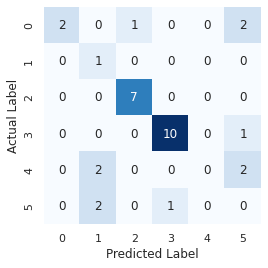

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
sn.set()
y_predicted=model.predict(testX)
mat=confusion_matrix(testY.argmax(axis=1),y_predicted.argmax(axis=1))
sn.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')